<h1 style="color:orange;text-align:center">DAY-3</h1>

<h2 style="color:yellow;text-align:center">PLOTLY LIBRARY</h2>

In [96]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
data = {
    "fruits":['apples','bananas','cherries'],
    "sale":[50,70,30],
}
fig = px.bar(data,x='fruits',y='sale',title='Fruit Sales')
fig.show()

In [3]:
fig = go.Figure(data=[
    go.Bar(name='apples',x=['2021','2022','2023'],y=[10,20,30]),
    go.Bar(name='banana',x=['2021','2022','2023'],y=[15,25,35])
])
fig.update_layout(title='Yearly Fruit Sales',barmode='group')
fig.show()

In [4]:
df = pd.DataFrame({
    'x':[1,2,3,4],
    'y':[10,20,30,40],
    'z':[100,200,300,400]
})
fig = px.scatter_3d(df,x='x',y='y',z='z',title="3d scatter plot")
fig.show()

<h2 style="color:yellow;text-align:center">MACHINE LEARNING</h2>

In [5]:
data = {'customer_id':pd.Series([1,2,3,4,5]),'loan_type':pd.Series(['Home loan','personal loan','Education loan','Home loan','credit loan']),'Income':pd.Series(['30k','25k','15k','40k','35k'])}
loan_info = pd.DataFrame(data)
loan_info

,customer_id,loan_type,Income
0,1,Home loan,30k
1,2,personal loan,25k
2,3,Education loan,15k
3,4,Home loan,40k
4,5,credit loan,35k


In [6]:
loan_info = pd.get_dummies(loan_info,prefix_sep='_',drop_first=True,dtype=int)

In [7]:
loan_info

,customer_id,loan_type_Home loan,loan_type_credit loan,loan_type_personal loan,Income_25k,Income_30k,Income_35k,Income_40k
0,1,1,0,0,0,1,0,0
1,2,0,0,1,1,0,0,0
2,3,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,1
4,5,0,1,0,0,0,1,0


In [8]:
labelEncoder = LabelEncoder()
loan_info_encoded = loan_info.apply(labelEncoder.fit_transform)
loan_info_encoded

,customer_id,loan_type_Home loan,loan_type_credit loan,loan_type_personal loan,Income_25k,Income_30k,Income_35k,Income_40k
0,0,1,0,0,0,1,0,0
1,1,0,0,1,1,0,0,0
2,2,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,1
4,4,0,1,0,0,0,1,0


In [9]:
data1 = np.array([[-100.3],[27.5],[0],[-200.9],[1000]])
print(f'before scaling ,{data1}')
stdScaler = StandardScaler()
scaled = stdScaler.fit_transform(data1)
print(f'after scaling , {scaled}')

before scaling ,[[-100.3]
 [  27.5]
 [   0. ]
 [-200.9]
 [1000. ]]
after scaling , [[-0.5646401 ]
 [-0.27077707]
 [-0.33401051]
 [-0.79595951]
 [ 1.96538718]]


In [10]:
df = pd.read_csv("Price_exp.csv")

In [12]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [14]:
df.shape

(30, 2)

In [16]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [17]:
linearModel = LinearRegression()

In [41]:
x = df['YearsExperience'].values
y = df['Salary'].values
type(x)

numpy.ndarray

In [42]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
np.ndim(x),np.ndim(y)

(2, 2)

In [24]:
len(x)

30

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
len(X_train)

24

In [37]:
linearModel = linearModel.fit(X_train,y_train)

In [55]:
prediciton = linearModel.predict(X_test)

In [56]:
len(prediciton)

6

In [57]:
df.shape

(30, 2)

In [94]:
newPred = linearModel.predict(X_test)

In [68]:
newPred = np.floor(newPred)

In [71]:
df['prediction'] = newPred

In [72]:
df.head()

,YearsExperience,Salary,prediction
0,1.1,39343.0,35976.0
1,1.3,46205.0,37871.0
2,1.5,37731.0,39766.0
3,2.0,43525.0,44504.0
4,2.2,39891.0,46399.0


In [ ]:
linearModel.score(X_test,y_test)

0.8991118771201596

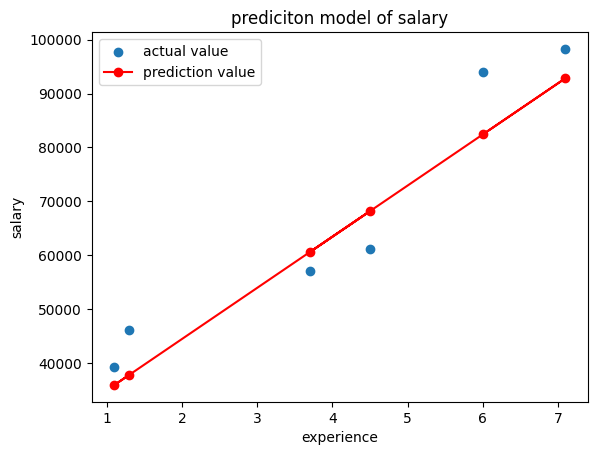

In [95]:
plt.scatter(X_test,y_test)
plt.title('prediciton model of salary')
plt.xlabel('experience')
plt.ylabel('salary')
plt.plot(X_test,newPred,marker='o',color='r')
plt.legend(['actual value','prediction value'])
plt.show()

<h2 style="color:yellow;text-align:center">LOGISTIC REGRESSION</h2>

In [97]:
logisticModel = LogisticRegression()

In [123]:
df2 = sns.load_dataset('iris')

In [99]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [101]:
df2.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [124]:
df2.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [125]:
df2 = df2[df2['species']!='setosa']

In [126]:
df2['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [127]:
di = {'versicolor':0,'virginica':1}

In [131]:
df2['species'] = df2['species'].map(di)

In [132]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [134]:
x = df2[['petal_width']].values
y = df2[['species']].values

In [146]:
x_train, y_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [148]:
logisticModel.fit(x_train,y_train)

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [149]:
pred = logisticModel.predict(x_test)

NameError: name 'x_test' is not defined

In [150]:
x_range = np.linspace(x.min(), x.max(),300).reshape(-1,1)
x_range

array([[1.        ],
       [1.00501672],
       [1.01003344],
       [1.01505017],
       [1.02006689],
       [1.02508361],
       [1.03010033],
       [1.03511706],
       [1.04013378],
       [1.0451505 ],
       [1.05016722],
       [1.05518395],
       [1.06020067],
       [1.06521739],
       [1.07023411],
       [1.07525084],
       [1.08026756],
       [1.08528428],
       [1.090301  ],
       [1.09531773],
       [1.10033445],
       [1.10535117],
       [1.11036789],
       [1.11538462],
       [1.12040134],
       [1.12541806],
       [1.13043478],
       [1.13545151],
       [1.14046823],
       [1.14548495],
       [1.15050167],
       [1.15551839],
       [1.16053512],
       [1.16555184],
       [1.17056856],
       [1.17558528],
       [1.18060201],
       [1.18561873],
       [1.19063545],
       [1.19565217],
       [1.2006689 ],
       [1.20568562],
       [1.21070234],
       [1.21571906],
       [1.22073579],
       [1.22575251],
       [1.23076923],
       [1.235

In [153]:
y_prob = logisticModel.predict_proba(x_range)[:,1]

In [154]:
y_prob

array([0.07472873, 0.07605705, 0.077407  , 0.07877888, 0.08017295,
       0.08158951, 0.08302884, 0.08449123, 0.08597696, 0.08748631,
       0.08901959, 0.09057706, 0.09215903, 0.09376578, 0.0953976 ,
       0.09705478, 0.09873761, 0.10044636, 0.10218134, 0.10394281,
       0.10573108, 0.10754643, 0.10938912, 0.11125946, 0.11315771,
       0.11508415, 0.11703907, 0.11902272, 0.12103539, 0.12307733,
       0.12514882, 0.12725011, 0.12938147, 0.13154315, 0.13373539,
       0.13595845, 0.13821257, 0.14049798, 0.14281492, 0.14516362,
       0.14754429, 0.14995716, 0.15240243, 0.15488031, 0.157391  ,
       0.15993468, 0.16251155, 0.16512177, 0.16776552, 0.17044296,
       0.17315424, 0.1758995 , 0.17867888, 0.1814925 , 0.18434049,
       0.18722294, 0.19013996, 0.19309163, 0.19607803, 0.19909922,
       0.20215525, 0.20524617, 0.20837201, 0.21153278, 0.2147285 ,
       0.21795914, 0.2212247 , 0.22452514, 0.22786041, 0.23123045,
       0.23463519, 0.23807454, 0.24154839, 0.24505662, 0.24859

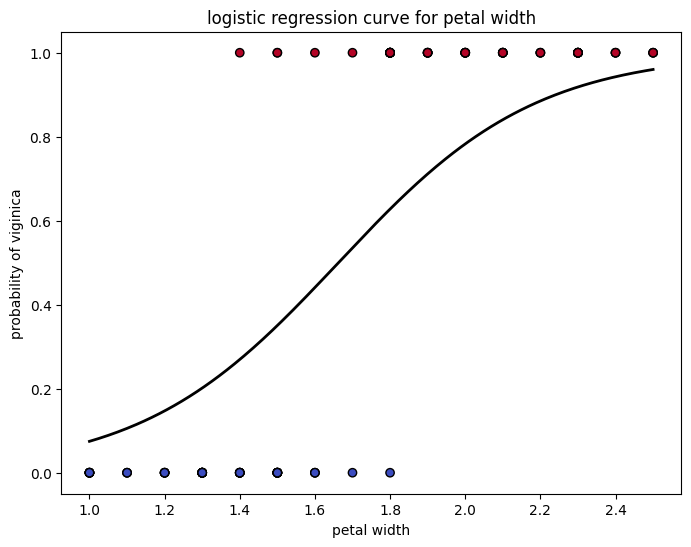

In [155]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,c=y,cmap='coolwarm',edgecolors='k')
plt.plot(x_range,y_prob,color='black',linewidth=2)
plt.xlabel('petal width')
plt.ylabel('probability of viginica')
plt.title('logistic regression curve for petal width')
plt.show()